<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/5%EC%A3%BC%EC%B0%A8/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EB%94%AE%EB%9F%AC%EB%8B%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# 1단계: 데이터 불러오기 및 전처리
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 데이터 로드
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 스케일링
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 훈련/테스트 분할
X_train, X_test, y_train_raw, y_test_raw = train_test_split(X_scaled, y, test_size=0.2)

In [37]:
# 2단계: 라벨 벡터화
from keras.utils import to_categorical

y_train = to_categorical(y_train_raw, num_classes=10)
y_test = to_categorical(y_test_raw, num_classes=10)

In [38]:
# 3단계: 모델 생성 및 학습
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 모델 구성
model = Sequential()
model.add(Dense(8, input_shape=(64,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1390 - loss: 2.2726 - val_accuracy: 0.3056 - val_loss: 2.1309
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4162 - loss: 1.9913 - val_accuracy: 0.4917 - val_loss: 1.5902
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5839 - loss: 1.3875 - val_accuracy: 0.7056 - val_loss: 0.9950
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7556 - loss: 0.8797 - val_accuracy: 0.7667 - val_loss: 0.7342
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8029 - loss: 0.6390 - val_accuracy: 0.8250 - val_loss: 0.5653
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8424 - loss: 0.5224 - val_accuracy: 0.8417 - val_loss: 0.4895
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8673 - loss: 0.4312 - val_accuracy: 0.8639 - val_loss: 0.4138
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8636 - loss: 0.4060 - val_accuracy: 0.8694 - val_loss: 0.3732
Ep

In [39]:
# 4단계: 예측
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [40]:
# 5단계: 결과 확인
import numpy as np
from sklearn.metrics import accuracy_score

# one-hot → 정수형 라벨로 변환
y_test_classes = np.argmax(y_test, axis=1)

# 정확도 계산
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print("테스트 세트 최종 정확도:", test_accuracy)

테스트 세트 최종 정확도: 0.9472222222222222


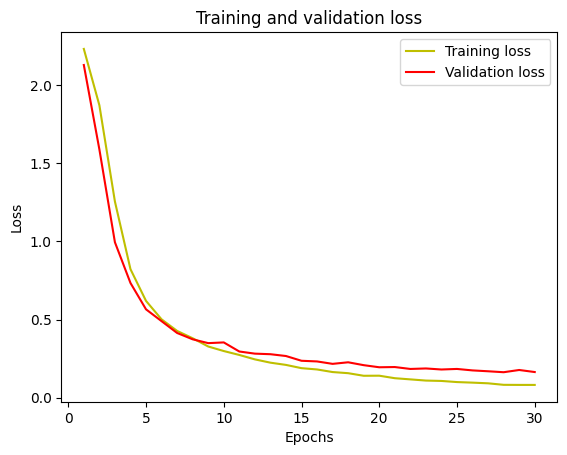

In [41]:
import matplotlib.pyplot as plt

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

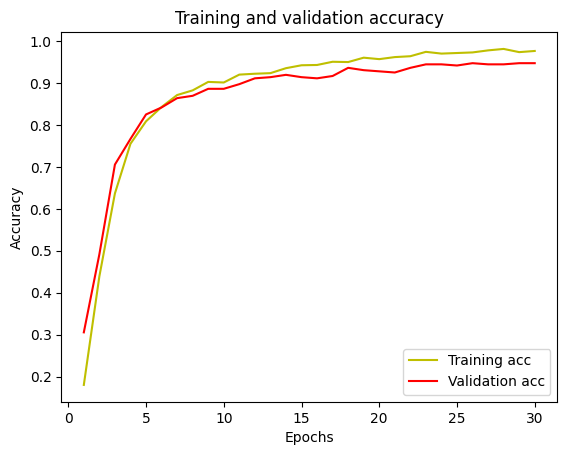

In [42]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()